### Processor
* VOC_duration : 1min
* Wash_Out : 8min

### Sensors
+ TGS : TGS2600, TGS2602, TGS2603, TGS2610, TGS2620
+ MQ : MQ2, MQ3, MQ4, MQ5, MQ6, MQ7, MQ8, MQ9, MQ135

### VOC
1. DPG ( 10%) + DPG (100%)
2. Actetic (10%) + DPG (99%)
3. Benzaldehyde (10%) + DPG (99%)
4. Keras (10%) + DPG (99%)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt

import datetime, time
import os
from pathlib import Path
from tqdm import tqdm
from datetime import datetime, timedelta
from pprint import pprint

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
plot_style = plt.style.available
# pd.options.display.float_format = '{:.5f}'.format
# pd.set_option('display.max_row', 500)
pd.set_option('display.max_rows', 500)

In [4]:
# plt.style.use('ggplot')
# plt.style.use('default')
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-paper')
# plt.style.use('seaborn-muted')

In [6]:
path = os.getcwd()
csv_dir = './csv/'
csv_dir

'./csv/'

In [7]:
UNIXSTAMP_TIMESTAMP_DIFF = int(1683662769740.6643)

In [8]:
file_list = os.listdir(csv_dir)
file_list

['MQ_data.csv', 'TGS_data.csv', 'Valve_data.csv']

In [9]:
sensor_files = sorted([file for file in file_list if "MQ" in file])
sensor_files = sensor_files + sorted([file for file in file_list if "TGS" in file])
sensor_files

['MQ_data.csv', 'TGS_data.csv']

In [10]:
valve_files = sorted([file for file in file_list if "Valve" in file])
# valve_files

In [11]:
# sensor_valve_pair = [(sensor, valve) for sensor, valve in zip(sensor_files, valve_files)]
# sensor_valve_pair

## Data Load

### valve

In [20]:
df_valve = pd.read_csv(f'{csv_dir}{valve_files[0]}')
df_valve = df_valve.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df_valve['UNIXSTAMP'] = pd.to_datetime(df_valve['UNIXSTAMP'].astype(int), unit='1s')
# df_valve['TIMESTAMP'] = pd.to_datetime(df_valve['TIMESTAMP'].astype(int), unit='ms')
# df_valve['TIME_DIFF'] = df_valve['UNIXSTAMP'] - df_valve['TIMESTAMP']
# TIME_DIFF_MS = df_valve['TIME_DIFF'].median()

df_valve.set_index('UNIXSTAMP', inplace=True)
# df_valve['UNIXSTAMP-TIMESTAMP_01'] = df_valve['UNIXSTAMP'] - df_valve['TIMESTAMP_01']

df_valve.head()

,VALVE,STEP,FAN,TIMESTAMP
UNIXSTAMP,,,,
2023-05-07 03:35:05,0.0,0.0,0.0,43403161.0
2023-05-07 03:36:05,0.0,1.0,1.0,43463702.0
2023-05-07 03:44:06,1.0,0.0,0.0,43944548.0
2023-05-07 03:45:07,1.0,1.0,1.0,44005675.0
2023-05-07 03:53:08,2.0,0.0,0.0,44486332.0


In [16]:
df_valve.describe()

,VALVE,STEP,FAN,TIMESTAMP,UNIXSTAMP,TIME_DIFF
count,1460.000000,1460.000000,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.497260,0.499315,0.499315,2.427275e+08,1.683905e+09,1.441178e+09
std,1.118414,0.500171,0.500171,1.156729e+08,1.053058e+07,1.163420e+08
min,0.000000,0.000000,0.000000,4.340316e+07,1.683431e+09,1.241437e+09
25%,0.000000,0.000000,0.000000,1.421018e+08,1.683530e+09,1.340594e+09
50%,1.000000,0.000000,0.000000,2.424018e+08,1.683630e+09,1.441228e+09
75%,2.000000,1.000000,1.000000,3.431359e+08,1.683730e+09,1.541427e+09
max,3.000000,1.000000,1.000000,4.423926e+08,2.085978e+09,1.972161e+09


### MQ sensor

In [17]:
df_sensor_MQ = pd.read_csv(f'{csv_dir}{sensor_files[0]}')
df_sensor_MQ.rename(columns={'UNIXSTAMP':'TIMESTAMP'}, inplace=True)
# df_sensor_MQ['UNIXSTAMP'] = ((df_sensor_MQ['TIMESTAMP'] + TIME_DIFF_MS)/1000).astype(int)
# df_sensor_MQ['UNIXSTAMP'] = pd.to_datetime(df_sensor_MQ['UNIXSTAMP'].astype(int), unit='1s')
# df_sensor_MQ.set_index('UNIXSTAMP', inplace=True)
df_sensor_MQ = df_sensor_MQ.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1).replace(0, np.nan)
df_sensor_MQ

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,TIMESTAMP
0,3.003983,0.000053,19.71662,0.668363,5.063669,0.674627,52.66417,7.888193,3.236763,45600454
1,3.003983,0.000053,19.71662,0.674482,5.063669,0.674627,52.66417,7.888193,3.345788,45602830
2,3.003983,0.000053,19.71662,0.674482,5.095932,0.674627,52.54733,7.888193,3.236763,45605207
3,3.003983,0.000053,19.59032,0.668363,5.063669,0.674627,52.54733,7.888193,3.290943,45607582
4,3.003983,0.000052,19.46471,0.668363,5.031571,0.674627,52.43047,7.809695,3.263770,45609958
...,...,...,...,...,...,...,...,...,...,...
166803,1.955147,0.000037,18.24611,0.956114,5.226663,0.659467,55.59365,8.168079,11.857920,443542202
166804,1.978890,0.000037,18.48445,0.947740,5.19373,0.659467,55.59365,8.127602,11.857920,443544578
166805,1.978890,0.000037,18.36494,0.956114,5.19373,0.659467,55.59365,8.168079,11.784680,443546954
166806,1.955147,0.000036,18.36494,0.956114,5.19373,0.659467,55.59365,8.168079,11.931540,443549330


### TGS sensor

In [21]:
df_sensor_TGS = pd.read_csv(f'{csv_dir}{sensor_files[1]}')
df_sensor_TGS['UNIXSTAMP'] = pd.to_datetime(df_sensor_TGS['UNIXSTAMP'].astype(int), unit='1s')
df_sensor_TGS.set_index('UNIXSTAMP', inplace=True)
df_sensor_TGS = df_sensor_TGS.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1).replace(0, np.nan)
df_sensor_TGS

,TGS2600,TGS2602,TGS2603,TGS2620,TGS2610,TGS822
UNIXSTAMP,,,,,,
2023-05-07 03:33:58,NaN,0.283631,NaN,NaN,NaN,NaN
2023-05-07 03:33:58,NaN,NaN,0.754354,NaN,NaN,NaN
2023-05-07 03:33:59,NaN,NaN,NaN,NaN,0.831280,NaN
2023-05-07 03:33:59,NaN,NaN,NaN,NaN,NaN,0.393873
2023-05-07 03:33:59,NaN,NaN,NaN,0.978842,NaN,NaN
...,...,...,...,...,...,...
2023-05-11 18:13:58,NaN,NaN,NaN,1.019189,NaN,NaN
2023-05-11 18:13:58,NaN,NaN,0.712445,NaN,NaN,NaN
2023-05-11 18:13:57,0.924886,NaN,NaN,NaN,NaN,NaN


# Full-length Raw DATA Collection

## Total Sensor information

In [12]:
SENSORS_MQ = ['MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ9', 'MQ135']
SENSORS_TGS = ['TGS2600', 'TGS2602', 'TGS2603', 'TGS2620', 'TGS2610', 'TGS822']

In [13]:
labels = {
    0: 'DPG',
    1: 'Acetic',
    2: 'Benzaldehyde',
    3: 'Keras'
}

In [18]:
df_sensor_tgs = pd.read_csv(f'{csv_dir}{sensor_files[1]}')
df_sensor_tgs['UNIXSTAMP'] = pd.to_datetime(df_sensor_tgs['UNIXSTAMP'].astype(int), unit='1s')
df_sensor_tgs.set_index('UNIXSTAMP', inplace=True)
df_sensor_tgs = df_sensor_tgs[SENSORS_TGS].replace(0, np.nan)

df_valve = pd.read_csv(f'{csv_dir}{valve_files[0]}')
df_valve = df_valve.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df_valve['UNIXSTAMP'] = pd.to_datetime(df_valve['UNIXSTAMP'].astype(int), unit='1s')
df_valve.set_index('UNIXSTAMP', inplace=True)
df_valve = df_valve['VALVE']

#     sample = sensor_file.split(' ')[0].split('_')[0]
# sample = sensor_file.split(' ')[0]

CYCLE_START_OFFSET_SEC = 4 # seconds
CYCLE_CLOSE_OFFSET_MIN = 9 # minutes

df = pd.DataFrame()
cycles = []
for i in range(len(df_valve)-1):
    cycle_temp = {}
    if df_valve.iloc[i] == df_valve.iloc[i+1]:            
        cycle_temp['CYCLE'] = int(i/2)
        cycle_temp['VOC'] = df_valve.iloc[i]
        cycle_temp['VOC_NAME'] = labels[df_valve.iloc[i]]
        cycle_temp['CYCLE_START'] = df_valve.index[i] - pd.Timedelta(seconds=CYCLE_START_OFFSET_SEC)
        cycle_temp['VALVE_OPEN'] = df_valve.index[i]
        cycle_temp['VALVE_CLOSE'] = df_valve.index[i+1]
        cycle_temp['CYCLE_END'] = df_valve.index[i]+ pd.Timedelta(minutes=CYCLE_CLOSE_OFFSET_MIN)
        cycles.append(cycle_temp)

# pprint(cycles)

for idx, cycle in enumerate(cycles[:]):
    cycle_cond = (cycle['CYCLE_START'] < df_sensor_tgs.index) & (df_sensor_tgs.index < cycle['CYCLE_END'])
#     valve_cond = (cycle['VALVE_OPEN'] < df_temp.index) & (df_temp.index < cycle['VALVE_CLOSE'])

    df_temp = df_sensor_tgs[cycle_cond].copy()
#     df_temp = df_temp.ffill().bfill()
    
    df_temp['CYCLE'] = cycle['CYCLE']
    df_temp['VOC'] = cycle['VOC']
    df_temp['VOC_NAME'] = cycle['VOC_NAME']
#     df_temp['TIME_RELATIVE'] = (df_temp.index - df_temp.index[0]).total_seconds()
#     df_temp.loc[valve_cond, 'VALVE'] = 1 # 0: close, 1:open
#     df_temp.loc[~valve_cond, 'VALVE'] = 0 # 0: close, 1:open
    df_temp.reset_index(inplace=True)
    df_temp.set_index(['VOC_NAME', 'CYCLE', 'UNIXSTAMP'], inplace=True)
    df_temp.sort_index(inplace=True)
    df = pd.concat([df, df_temp])

######################################################
# Figure generation (every single cycle)
######################################################

#     print(f'Cycle 총수: {len(cycles)}')

# plt.figure(figsize=(9, 6))
# for idx, cycle in enumerate(cycles[:100]):
#     cycle_cond = (cycle['CYCLE_START'] < df_sensor_tgs.index)  & (df_sensor_tgs.index < cycle['CYCLE_END'])
#     df_sensor_tgs_cycle = df_sensor_tgs[cycle_cond]
    
#     title = 'Cycle: ' + str(cycle['CYCLE']) + '/' + str(len(cycles)) + ', VOC: ' + str((cycle['VOC_NAME']))
#     for sensor in SENSORS_TGS:
#         df_sensor_tgs_cycle[sensor].dropna().plot()
#         plt.title(title, fontsize=14, loc="left")
#         plt.legend(loc='upper left', bbox_to_anchor=(1.00, 1))

# # #             plt.axvspan(cycle['valve_open'], cycle['valve_close'], color="gray", alpha=0.01)
#     plt.show()

In [19]:
df

TGS2600   TGS2602   TGS2603   TGS2620  \
VOC_NAME CYCLE UNIXSTAMP                                                     
DPG      0     2023-05-07 03:35:02  0.865818       NaN       NaN       NaN   
               2023-05-07 03:35:02       NaN  0.283631       NaN       NaN   
               2023-05-07 03:35:02       NaN       NaN  0.740384       NaN   
               2023-05-07 03:35:03       NaN       NaN       NaN       NaN   
               2023-05-07 03:35:03       NaN       NaN       NaN       NaN   
...                                      ...       ...       ...       ...   
Acetic   727   2023-05-11 18:13:57  0.924886       NaN       NaN       NaN   
               2023-05-11 18:13:58       NaN       NaN       NaN  1.019189   
               2023-05-11 18:13:58       NaN       NaN  0.712445       NaN   
               2023-05-11 18:13:59       NaN  0.380066       NaN       NaN   
               2023-05-11 18:13:59       NaN       NaN       NaN       NaN   

                                     TGS2610    TGS822  VOC  
VOC_NAME CYCLE UNIXSTAMP                                     
DPG      0     2023-05-07 03:35:02       NaN       NaN  0.0  
               2023-05-07 03:35:02       NaN       NaN  0.0  
               2023-05-07 03:35:02       NaN       NaN  0.0  
               2023-05-07 03:35:03  0.831280       NaN  0.0  
               2023-05-07 03:35:03       NaN  0.393873  0.0  
...                                      ...       ...  ...  
Acetic   727   2023-05-11 18:13:57       NaN       NaN  1.0  
               2023-05-11 18:13:58       NaN       NaN  1.0  
               2023-05-11 18:13:58       NaN       NaN  1.0  
               2023-05-11 18:13:59       NaN       NaN  1.0  
               2023-05-11 18:13:59  0.933691       NaN  1.0  

[1181411 rows x 7 columns]

#### Data saving

In [21]:
df.to_hdf('drug_data_raw.h5', 'drug/tgs_sensors/raw_data')

## Total valve cycle information

In [22]:
df_cycles = pd.DataFrame(cycles)
df_cycles.columns = df_cycles.columns.str.upper()
df_cycles

,CYCLE,VOC,VOC_NAME,CYCLE_START,VALVE_OPEN,VALVE_CLOSE,CYCLE_END
0,0,0.0,DPG,2023-05-07 03:35:01,2023-05-07 03:35:05,2023-05-07 03:36:05,2023-05-07 03:44:05
1,1,1.0,Acetic,2023-05-07 03:44:02,2023-05-07 03:44:06,2023-05-07 03:45:07,2023-05-07 03:53:06
2,2,2.0,Benzaldehyde,2023-05-07 03:53:04,2023-05-07 03:53:08,2023-05-07 03:54:09,2023-05-07 04:02:08
3,3,3.0,Keras,2023-05-07 04:02:05,2023-05-07 04:02:09,2023-05-07 04:03:10,2023-05-07 04:11:09
4,4,0.0,DPG,2023-05-07 04:11:07,2023-05-07 04:11:11,2023-05-07 04:12:11,2023-05-07 04:20:11
...,...,...,...,...,...,...,...
724,724,2.0,Benzaldehyde,2023-05-11 17:39:39,2023-05-11 17:39:43,2023-05-11 17:40:44,2023-05-11 17:48:43
725,725,3.0,Keras,2023-05-11 17:48:40,2023-05-11 17:48:44,2023-05-11 17:49:45,2023-05-11 17:57:44
726,726,0.0,DPG,2023-05-11 17:57:42,2023-05-11 17:57:46,2023-05-11 17:58:47,2023-05-11 18:06:46
727,727,1.0,Acetic,2023-05-11 18:06:44,2023-05-11 18:06:48,2023-05-11 18:07:49,2023-05-11 18:15:48


#### Data saving

In [23]:
df_cycles.to_hdf('drug_data_raw.h5', 'drug/valves/raw_data')

# 1-second Resampling Data Collection 

### Sensor Data Resampling

In [15]:
with pd.HDFStore('drug_data_raw.h5') as store:
    df_01 = store['drug/tgs_sensors/raw_data']
    print(store.info())
df_01

<class 'pandas.io.pytables.HDFStore'>
File path: drug_data_raw.h5
/drug/tgs_sensors/raw_data            frame        (shape->[1181411,7])
/drug/valves/raw_data                 frame        (shape->[729,7])    


TGS2600   TGS2602   TGS2603   TGS2620  \
VOC_NAME CYCLE UNIXSTAMP                                                     
DPG      0     2023-05-07 03:35:02  0.865818       NaN       NaN       NaN   
               2023-05-07 03:35:02       NaN  0.283631       NaN       NaN   
               2023-05-07 03:35:02       NaN       NaN  0.740384       NaN   
               2023-05-07 03:35:03       NaN       NaN       NaN       NaN   
               2023-05-07 03:35:03       NaN       NaN       NaN       NaN   
...                                      ...       ...       ...       ...   
Acetic   727   2023-05-11 18:13:57  0.924886       NaN       NaN       NaN   
               2023-05-11 18:13:58       NaN       NaN       NaN  1.019189   
               2023-05-11 18:13:58       NaN       NaN  0.712445       NaN   
               2023-05-11 18:13:59       NaN  0.380066       NaN       NaN   
               2023-05-11 18:13:59       NaN       NaN       NaN       NaN   

                                     TGS2610    TGS822  VOC  
VOC_NAME CYCLE UNIXSTAMP                                     
DPG      0     2023-05-07 03:35:02       NaN       NaN  0.0  
               2023-05-07 03:35:02       NaN       NaN  0.0  
               2023-05-07 03:35:02       NaN       NaN  0.0  
               2023-05-07 03:35:03  0.831280       NaN  0.0  
               2023-05-07 03:35:03       NaN  0.393873  0.0  
...                                      ...       ...  ...  
Acetic   727   2023-05-11 18:13:57       NaN       NaN  1.0  
               2023-05-11 18:13:58       NaN       NaN  1.0  
               2023-05-11 18:13:58       NaN       NaN  1.0  
               2023-05-11 18:13:59       NaN       NaN  1.0  
               2023-05-11 18:13:59  0.933691       NaN  1.0  

[1181411 rows x 7 columns]

In [2]:
df = df_01.copy()

NameError: name 'df_01' is not defined

In [46]:
df.reset_index(inplace=True)
df.columns = df.columns.str.upper()
df['VOC_CYCLE'] = df['VOC_NAME'].astype(str) + '_' + df['CYCLE'].astype(str).str.zfill(3)

In [47]:
columns = ['TGS2600', 'TGS2602', 'TGS2603', 'TGS2620', 'TGS2610', 'TGS822',
           'VOC_CYCLE', 'UNIXSTAMP']

In [48]:
df = df[columns]
# df.set_index(['SAMPLE_CYCLE_VOC', 'TIME'], inplace=True)
df.set_index('UNIXSTAMP', inplace=True)
df = df.groupby('VOC_CYCLE').apply(lambda x: x.ffill().bfill()).reset_index(level='VOC_CYCLE', drop=True)
df = df.groupby('VOC_CYCLE').apply(lambda x: x.resample('1S').mean())

In [49]:
df

TGS2600   TGS2602   TGS2603   TGS2620  \
VOC_CYCLE  UNIXSTAMP                                                     
Acetic_001 2023-05-07 03:44:03  0.859600  0.304431  0.804644  0.999893   
           2023-05-07 03:44:04  0.859600  0.304431  0.804644  0.999893   
           2023-05-07 03:44:05  0.859600  0.306322  0.804644  0.999893   
           2023-05-07 03:44:06  0.877476  0.306322  0.804644  0.992876   
           2023-05-07 03:44:07  0.895352  0.325231  0.804644  0.992876   
...                                  ...       ...       ...       ...   
Keras_725  2023-05-11 17:57:39  0.960638  0.391411  0.790675  0.994630   
           2023-05-11 17:57:40  0.960638  0.391411  0.790675  0.994630   
           2023-05-11 17:57:41  0.960638  0.391411  0.790675  0.994630   
           2023-05-11 17:57:42  0.959084  0.391411  0.790675  0.993461   
           2023-05-11 17:57:43  0.959084  0.391411  0.790675  0.992876   

                                 TGS2610    TGS822  
VOC_CYCLE  UNIXSTAMP                                
Acetic_001 2023-05-07 03:44:03  0.859078  0.393873  
           2023-05-07 03:44:04  0.859078  0.393873  
           2023-05-07 03:44:05  0.856431  0.393873  
           2023-05-07 03:44:06  0.853783  0.393873  
           2023-05-07 03:44:07  0.908055  0.393873  
...                                  ...       ...  
Keras_725  2023-05-11 17:57:39  0.961540  0.393873  
           2023-05-11 17:57:40  0.967403  0.393873  
           2023-05-11 17:57:41  0.952745  0.393873  
           2023-05-11 17:57:42  0.945417  0.393873  
           2023-05-11 17:57:43  0.946394  0.393873  

[394550 rows x 6 columns]

#### Data saving

In [50]:
df.to_hdf('drug_data_1sec.h5', 'drug/tgs_sensers/1sec_mean')

# Graph Generation

In [1]:
idx = pd.IndexSlice
samples = df.index.get_level_values('VOC_CYCLE').unique().tolist()
# print(samples)

sensors = ['TGS2600', 'TGS2602', 'TGS2603', 'TGS2620', 'TGS2610', 'TGS822']

NameError: name 'pd' is not defined

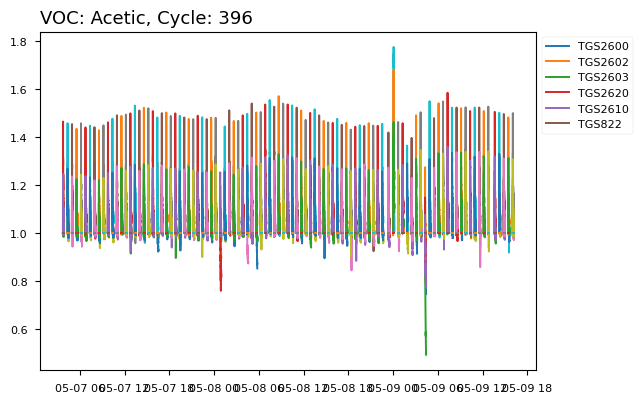

In [56]:
for sample in samples[:100]:
    df_temp = df.loc[idx[str(sample), :], :]
#     cycles = df_temp.index.get_level_values('CYCLE').unique().tolist()
              
    for sensor in sensors:
        df_temp_sensor = df_temp[sensor].dropna()
#             plt.plot(df_temp_sensor.index.get_level_values(2), df_temp_sensor)
        if len(df_temp_sensor) == 0:
            continue
        df_temp_sensor_ratio = df_temp_sensor
        df_temp_sensor_ratio = df_temp_sensor / df_temp_sensor[0] # 비율
        plt.plot(df_temp_sensor_ratio.index.get_level_values('UNIXSTAMP'), df_temp_sensor_ratio)
        plt.legend(sensors, loc='upper left', bbox_to_anchor=(1.00, 1))
#         valve_on = df_temp_temp[df_temp_temp['VALVE'] == 'open'].index.get_level_values('TIME_RELATIVE')
#         plt.axvspan(valve_on.min(), valve_on.max(), color="gray", alpha=0.1)
            
    title_info = sample.split('_') 
    title = 'VOC: ' + str(title_info[0]) + ', Cycle: ' + str(title_info[1])
    plt.title(title, fontsize=13, loc="left")

    plt.show()